In [1]:
import os
import re
import nltk
import spacy
import string
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.listdir('/content/drive/MyDrive/Resumes')

['React Developer',
 'workday resumes',
 'Peoplesoft resumes',
 'SQL Developer Lightning insight']

In [4]:
pip install textract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [5]:
!sudo apt-get install -y antiword


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 1s (223 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package antiword.
(Reading database ... 121730 files and directories currentl

In [6]:
import textract


In [7]:
file_path1 = []
category1  = []
directory1 = '/content/drive/MyDrive/Resumes/Peoplesoft resumes'
for i in os.listdir(directory1):
    if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [8]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

Raw_Details   Category1
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft
1   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  PeopleSoft
2   \n                        PeopleSoft Admin/Peo...  PeopleSoft
3   \nVinod Akkala\nPeopleSoft DBA Admin.\n\nProfe...  PeopleSoft
4   \nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n   ...  PeopleSoft
5   \n\nR Ahmed\n      PeopleSoft Technical Consul...  PeopleSoft
6   PeopleSoft Administration\n\n \n\nVivekanand S...  PeopleSoft
7   \n                                PeopleSoft D...  PeopleSoft
8   Classification: Internal\n\nClassification: In...  PeopleSoft
9   PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  PeopleSoft
10  C O N T A C T :\n\n\n\nAddress: Manyata Tech P...  PeopleSoft
11  \n|Personal Details                           ...  PeopleSoft
12  \n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...  PeopleSoft
13  \nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...  PeopleSoft
14  \n                                    PEOPLESO...  PeopleSoft
15  Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...  PeopleSoft
16  \nRahul Ahuja\n-------------------------------...  PeopleSoft
17  Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...  PeopleSoft
18  Hari Narayana \t\t              \n\n\t\n\n\n\n...  PeopleSoft
19  Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...  PeopleSoft

In [9]:
file_path2 = []
category2  = []
directory2 = '/content/drive/MyDrive/Resumes/React Developer'
for i in os.listdir(directory2):
    if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [10]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

Raw_Details           Category2
0   Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React JS Developer
1   SUSOVAN  BAG   \n\nSeeking  a  challenging  po...  React JS Developer
2   PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...  React JS Developer
3   Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...  React JS Developer
4   \n                                        CURR...  React JS Developer
5   Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer
6   KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...  React JS Developer
7   Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React JS Developer
8   KAMALAKAR REDDY. A \n\nLinked In: https://www....  React JS Developer
9   \n [pic]\n\nPROFILE\n\n Searching for the oppo...  React JS Developer
10  Naveen Sadhu\n\n\n\n\n\nTitle: software develo...  React JS Developer
11  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React JS Developer
12  \nMaryala Vinay Reddy\n\nProfessional Summary:...  React JS Developer
13  Venkatalakshmi Pedireddy\n\nSoftware Developer...  React JS Developer
14   \n\n \n\nName: M. Prabakaran \nTitle: UI Deve...  React JS Developer
15  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React JS Developer
16  Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...  React JS Developer
17  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React JS Developer
18  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React JS Developer
19  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React JS Developer
20  Name: Ravali P \n\n\n\n                       ...  React JS Developer
21  Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...  React JS Developer
22  HARIPRIYA BATTINA \n\nExperience as UI Develop...  React JS Developer
23  SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...  React JS Developer

In [11]:
file_path3 = []
category3  = []
directory3 = '/content/drive/MyDrive/Resumes/SQL Developer Lightning insight'
for i in os.listdir(directory3):
   if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [12]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

Raw_Details      Category3
0   ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...  SQL Developer
1   Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...  SQL Developer
2   KAMBALLA PRADEEP                              ...  SQL Developer
3   RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...  SQL Developer
4   Aradhana Tripathi\n\n\n\nCurrent Location: Gac...  SQL Developer
5   Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...  SQL Developer
6   SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...  SQL Developer
7   BUDDHA VAMSI                                  ...  SQL Developer
8   \n\nCareer objective\n\n\nA rewarding opportun...  SQL Developer
9   resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...  SQL Developer
10  SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...  SQL Developer
11  SQL DEVELOPER\n\nName: -   Bandi prem sai\n\n\...  SQL Developer
12  \n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...  SQL Developer
13  \n                                       SQL S...  SQL Developer

In [13]:
file_path4 = []
category4  = []
directory4 = '/content/drive/MyDrive/Resumes/workday resumes'
for i in os.listdir(directory4):
   if i.endswith('.docx') or i.endswith('.doc') or i.endswith('.pdf'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')


In [14]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

Raw_Details Category4
0   \nVenkateswarlu.B                             ...   Workday
1   VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...   Workday
2   WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...   Workday
3   \n                                         Har...   Workday
4   \nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...   Workday
5   \n      Workday Integration Consultant\n\nName...   Workday
6   \n[pic]                                   Name...   Workday
7   Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...   Workday
8   JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...   Workday
9   \nShireesh                                    ...   Workday
10  Workday HCM  Techno functional Consultant     ...   Workday
11  Vinay kumar .v\nWorkday Functional Consultant\...   Workday
12  Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...   Workday
13  \nHarikrishna Akula\n\n\n\n Summary:\n    ❖ 5....   Workday
14  \n  [pic]\n  [pic]\n\n    • 3.3 years of IT ex...   Workday
15  Name         : Gopi Krishna Reddy\n\n\t\t\t\t ...   Workday
16  \n\n                             Madeeswar A\n...   Workday
17  Srikanth (WORKDAY hCM Consultant)\t           ...   Workday
18  Mooraboyina Guravaiah\n\nWorkday Integration S...   Workday
19  \nName  : Naresh Babu Cherukuri\n\n\nObjective...   Workday
20  G Himaja\n\n                                  ...   Workday

In [15]:
Resume_data = data1.append([data2, data3, data4], ignore_index = True)
Resume_data


Raw_Details   Category1 Category2  \
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft       NaN   
1   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  PeopleSoft       NaN   
2   \n                        PeopleSoft Admin/Peo...  PeopleSoft       NaN   
3   \nVinod Akkala\nPeopleSoft DBA Admin.\n\nProfe...  PeopleSoft       NaN   
4   \nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n   ...  PeopleSoft       NaN   
..                                                ...         ...       ...   
74  \n\n                             Madeeswar A\n...         NaN       NaN   
75  Srikanth (WORKDAY hCM Consultant)\t           ...         NaN       NaN   
76  Mooraboyina Guravaiah\n\nWorkday Integration S...         NaN       NaN   
77  \nName  : Naresh Babu Cherukuri\n\n\nObjective...         NaN       NaN   
78  G Himaja\n\n                                  ...         NaN       NaN   

   Category3 Category4  
0        NaN       NaN  
1        NaN       NaN  
2        NaN       NaN  
3        NaN       NaN  
4        NaN       NaN  
..       ...       ...  
74       NaN   Workday  
75       NaN   Workday  
76       NaN   Workday  
77       NaN   Workday  
78       NaN   Workday  

[79 rows x 5 columns]

In [16]:
Resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category1    20 non-null     object
 2   Category2    24 non-null     object
 3   Category3    14 non-null     object
 4   Category4    21 non-null     object
dtypes: object(5)
memory usage: 3.2+ KB


In [17]:
Resume_data['Category'] = category1 + category2 + category3 + category4
Resume_data

Raw_Details   Category1 Category2  \
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft       NaN   
1   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  PeopleSoft       NaN   
2   \n                        PeopleSoft Admin/Peo...  PeopleSoft       NaN   
3   \nVinod Akkala\nPeopleSoft DBA Admin.\n\nProfe...  PeopleSoft       NaN   
4   \nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n   ...  PeopleSoft       NaN   
..                                                ...         ...       ...   
74  \n\n                             Madeeswar A\n...         NaN       NaN   
75  Srikanth (WORKDAY hCM Consultant)\t           ...         NaN       NaN   
76  Mooraboyina Guravaiah\n\nWorkday Integration S...         NaN       NaN   
77  \nName  : Naresh Babu Cherukuri\n\n\nObjective...         NaN       NaN   
78  G Himaja\n\n                                  ...         NaN       NaN   

   Category3 Category4    Category  
0        NaN       NaN  PeopleSoft  
1        NaN       NaN  PeopleSoft  
2        NaN       NaN  PeopleSoft  
3        NaN       NaN  PeopleSoft  
4        NaN       NaN  PeopleSoft  
..       ...       ...         ...  
74       NaN   Workday     Workday  
75       NaN   Workday     Workday  
76       NaN   Workday     Workday  
77       NaN   Workday     Workday  
78       NaN   Workday     Workday  

[79 rows x 6 columns]

In [18]:
Resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = Resume_data[["Category", "Raw_Details"]]

In [19]:
Resume_data.head(15)

Raw_Details    Category
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft
1   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  PeopleSoft
2   \n                        PeopleSoft Admin/Peo...  PeopleSoft
3   \nVinod Akkala\nPeopleSoft DBA Admin.\n\nProfe...  PeopleSoft
4   \nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n   ...  PeopleSoft
5   \n\nR Ahmed\n      PeopleSoft Technical Consul...  PeopleSoft
6   PeopleSoft Administration\n\n \n\nVivekanand S...  PeopleSoft
7   \n                                PeopleSoft D...  PeopleSoft
8   Classification: Internal\n\nClassification: In...  PeopleSoft
9   PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...  PeopleSoft
10  C O N T A C T :\n\n\n\nAddress: Manyata Tech P...  PeopleSoft
11  \n|Personal Details                           ...  PeopleSoft
12  \n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...  PeopleSoft
13  \nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...  PeopleSoft
14  \n                                    PEOPLESO...  PeopleSoft

In [20]:
Resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  79 non-null     object
 1   Category     79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [21]:
Resume_data.describe()

Raw_Details            Category
count                                                  79                  79
unique                                                 79                   4
top     Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  React JS Developer
freq                                                    1                  24

In [22]:
Resume_data.isnull().sum()

Raw_Details    0
Category       0
dtype: int64

In [23]:
Resume_data.shape


(79, 2)

In [24]:
Resume_data["Raw_Details"][1]

"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n\nSIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUMMARY\n\n\n\nI have overall 6.8 years’ experience as PeopleSoft Administrator. Installed PeopleTools 8.55 from the scratch including its products. \n\nExperience in Peopletools 8.51, 8.54.08, 8.55.07&Application 9.0 and 9.2 (HRMS/FSCM). Deterministic approach towards problem solving & troubleshooting.\n\nProficient in Integration Broker.\n\nUpgraded FSCM and HCM applications to PeopleTools 8.55.07 from PeopleTools 8.54.08.\n\n\n\nEDUCATION\n\n\n\nGraduated B-Tech in Electronics and Communication Engg. from M.V.G.R College of Engineering, Vizianagaram(JNTUK) with an aggregate of 68.93%.\n\nAchieved 90% marks in 12th standard. Scored 86% in 10th standard.\n\n\n\nACHIEVEMENTS\n\nAwarded Bravo in 2015 Q3, 2016 Q1 and Pat on Back in Q2, 2016, Q1, 2017 in Techahindra.\n\nAwarded Associate of the month award and Innovator of the month (1 ti

In [25]:
Resume_data["Raw_Details"][2]

"\n                        PeopleSoft Admin/PeopleSoft DBA\n\nGanesh Alladi\n\n\n\n\nCareer Objective:\n\nI have total 6.4 Years Experience in IT. With my valid expertise of 4.4 years in PeopleSoft\nAdmin and PeopleSoft DBA. I hope to enhance my skill set while adding value to the business, to\nenable implementation of solutions, which aid the company’s objectives, understanding and\nanticipating the needs, interests and motivations of the clients and to deliver on time, budget\nand to quality, Delivering value through improving agility, quality and reliability\n\nProfessional Summary:\n\n  ➢ Over 4.4 years of experience in PeopleSoft implementation, Support , PeopleTools  Upgrades,\n     Application upgrades ,configuration, migrations, maintenance and administration of\n    Application Server Domains, Process Scheduler Servers, Web Server Domains, PUM  and SES.\n  ➢ Involved in various Tools and Application Upgrades.\n  ➢ Extensively involved in resolving Performance issues.\n  ➢ Conf

In [26]:
Resume_data["Raw_Details"][4]


'\nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n    • Experience of 04 Years 08 Months in multiple PeopleSoft Upgrade, Implementation and\n      Support projects in FSCM/HCM with Global clients.\n    • In Depth Knowledge and experience in working with PeopleTools - Application Engine,\n      PeopleCode, Application Package, File Layout, ExcelToCI, PSQuery, and reporting with SQRs,\n      BI Publisher.\n    • Worked on FSCM upgrade which includes Vanilla Compare, Retrofitting of Objects SIT, UAT\n      and Go Live activities.\n    • Good experience in Upgrade, Implementation modules.\n    • Good experience in all phases of the Application Development cycle - Design, Coding,\n      Testing, Maintenance and Documentation.\n    • Worked on creating custom reports using BI Publisher, SQR, and PS Query.\n    • Worked on Testing tool PTF(Peoplesoft Testing Framework)\n    • Excellent capability to explore, learn and understand newer business domains and\n      technologies.\n    • Good communicat

In [27]:
Resume_data["Raw_Details"][9]

"PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCareer Objective:\n\n\n\nI have total 4.2 Years’ Experience in PeopleSoft Admin and PeopleSoft DBA. I hope to enhance my skill set while adding value to the business, to enable implementation of solutions, which aid the company’s objectives, understanding and anticipating the needs, interests and motivations of the clients and to deliver on time, budget and to quality, delivering value through improving agility, quality and reliability\n\n\n\nProfessional Summary:\n\n\n\n\tHaving 4.2 years of experience in PeopleSoft implementation, Support, People Tools Upgrades, configuration, migrations, maintenance and administration of Application Server Domains, Process Scheduler Servers, Web Server Domains, PUM and Elastic search.\n\n\tInvolved in various Tools and Application Upgrades.\n\n\tExperience in driving Infrastructure Hardware Upgrades, Disaster Recovery Activities.\n\n\tConfigured https and secure web server (SSL) administration.\n\n\tMonitor 

In [28]:
Resume_data.to_csv('Raw_Resume.csv', index=False)


In [29]:
Resume_data = pd.read_csv("Raw_Resume.csv")
Resume_data

Raw_Details    Category
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft
1   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  PeopleSoft
2   \n                        PeopleSoft Admin/Peo...  PeopleSoft
3   \nVinod Akkala\nPeopleSoft DBA Admin.\n\nProfe...  PeopleSoft
4   \nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n   ...  PeopleSoft
..                                                ...         ...
74  \n\n                             Madeeswar A\n...     Workday
75  Srikanth (WORKDAY hCM Consultant)\t           ...     Workday
76  Mooraboyina Guravaiah\n\nWorkday Integration S...     Workday
77  \nName  : Naresh Babu Cherukuri\n\n\nObjective...     Workday
78  G Himaja\n\n                                  ...     Workday

[79 rows x 2 columns]

In [30]:
Resume_data

Raw_Details    Category
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft
1   SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...  PeopleSoft
2   \n                        PeopleSoft Admin/Peo...  PeopleSoft
3   \nVinod Akkala\nPeopleSoft DBA Admin.\n\nProfe...  PeopleSoft
4   \nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n   ...  PeopleSoft
..                                                ...         ...
74  \n\n                             Madeeswar A\n...     Workday
75  Srikanth (WORKDAY hCM Consultant)\t           ...     Workday
76  Mooraboyina Guravaiah\n\nWorkday Integration S...     Workday
77  \nName  : Naresh Babu Cherukuri\n\n\nObjective...     Workday
78  G Himaja\n\n                                  ...     Workday

[79 rows x 2 columns]

In [31]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
import pandas as pd
import re

# Assuming 'Raw_Details' is a column in the DataFrame 'Resume_data'
# You can replace 'Raw_Details' with the actual column name in your dataset
Resume_data['Raw_Details'] = Resume_data['Raw_Details'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Display the modified dataset
print(Resume_data)


                                          Raw_Details    Category
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft
1   SIRAZUDDIN M\n\n\tBangalore INDIA\t\n\n\n\n\n\...  PeopleSoft
2   \n                        PeopleSoft AdminPeop...  PeopleSoft
3   \nVinod Akkala\nPeopleSoft DBA Admin\n\nProfes...  PeopleSoft
4   \nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n   ...  PeopleSoft
..                                                ...         ...
74  \n\n                             Madeeswar A\n...     Workday
75  Srikanth WORKDAY hCM Consultant\t             ...     Workday
76  Mooraboyina Guravaiah\n\nWorkday Integration S...     Workday
77  \nName   Naresh Babu Cherukuri\n\n\nObjective\...     Workday
78  G Himaja\n\n                                  ...     Workday

[79 rows x 2 columns]


In [33]:
resume_data[resume_data.Category == 'Workday']

Category                                        Raw_Details
58  Workday  \nVenkateswarlu.B                             ...
59  Workday  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
60  Workday  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
61  Workday  \n                                         Har...
62  Workday  \nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...
63  Workday  \n      Workday Integration Consultant\n\nName...
64  Workday  \n[pic]                                   Name...
65  Workday  Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
66  Workday  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
67  Workday  \nShireesh                                    ...
68  Workday  Workday HCM  Techno functional Consultant     ...
69  Workday  Vinay kumar .v\nWorkday Functional Consultant\...
70  Workday  Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
71  Workday  \nHarikrishna Akula\n\n\n\n Summary:\n    ❖ 5....
72  Workday  \n  [pic]\n  [pic]\n\n    • 3.3 years of IT ex...
73  Workday  Name         : Gopi Krishna Reddy\n\n\t\t\t\t ...
74  Workday  \n\n                             Madeeswar A\n...
75  Workday  Srikanth (WORKDAY hCM Consultant)\t           ...
76  Workday  Mooraboyina Guravaiah\n\nWorkday Integration S...
77  Workday  \nName  : Naresh Babu Cherukuri\n\n\nObjective...
78  Workday  G Himaja\n\n                                  ...

In [34]:
resume_data[resume_data.Category == 'PeopleSoft']

Category                                        Raw_Details
0   PeopleSoft  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1   PeopleSoft  SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...
2   PeopleSoft  \n                        PeopleSoft Admin/Peo...
3   PeopleSoft  \nVinod Akkala\nPeopleSoft DBA Admin.\n\nProfe...
4   PeopleSoft  \nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n   ...
5   PeopleSoft  \n\nR Ahmed\n      PeopleSoft Technical Consul...
6   PeopleSoft  PeopleSoft Administration\n\n \n\nVivekanand S...
7   PeopleSoft  \n                                PeopleSoft D...
8   PeopleSoft  Classification: Internal\n\nClassification: In...
9   PeopleSoft  PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
10  PeopleSoft  C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
11  PeopleSoft  \n|Personal Details                           ...
12  PeopleSoft  \n\n\n\n\n\n\n\n\nProfile Summary:\n • 7+ year...
13  PeopleSoft  \nPriyanka Ramadoss\n\n61/46, MountPleasant,\n...
14  PeopleSoft  \n                                    PEOPLESO...
15  PeopleSoft  Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
16  PeopleSoft  \nRahul Ahuja\n-------------------------------...
17  PeopleSoft  Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
18  PeopleSoft  Hari Narayana \t\t              \n\n\t\n\n\n\n...
19  PeopleSoft  Murali\t\t       \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...

In [35]:
resume_data[resume_data.Category == 'React JS Developer']

Category                                        Raw_Details
20  React JS Developer  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...
21  React JS Developer  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...
22  React JS Developer  PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...
23  React JS Developer  Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...
24  React JS Developer  \n                                        CURR...
25  React JS Developer  Ui-Developer/ React JS Developer \n\nNAME: KRI...
26  React JS Developer  KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...
27  React JS Developer  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...
28  React JS Developer  KAMALAKAR REDDY. A \n\nLinked In: https://www....
29  React JS Developer  \n [pic]\n\nPROFILE\n\n Searching for the oppo...
30  React JS Developer  Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
31  React JS Developer  Ui-Developer/ React JS Developer \n\nNAME: KRI...
32  React JS Developer  \nMaryala Vinay Reddy\n\nProfessional Summary:...
33  React JS Developer  Venkatalakshmi Pedireddy\n\nSoftware Developer...
34  React JS Developer   \n\n \n\nName: M. Prabakaran \nTitle: UI Deve...
35  React JS Developer  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...
36  React JS Developer  Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...
37  React JS Developer  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...
38  React JS Developer  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...
39  React JS Developer  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...
40  React JS Developer  Name: Ravali P \n\n\n\n                       ...
41  React JS Developer  Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...
42  React JS Developer  HARIPRIYA BATTINA \n\nExperience as UI Develop...
43  React JS Developer  SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...

In [36]:
resume_data[resume_data.Category == 'SQL Developer']

Category                                        Raw_Details
44  SQL Developer  ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...
45  SQL Developer  Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...
46  SQL Developer  KAMBALLA PRADEEP                              ...
47  SQL Developer  RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...
48  SQL Developer  Aradhana Tripathi\n\n\n\nCurrent Location: Gac...
49  SQL Developer  Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...
50  SQL Developer  SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...
51  SQL Developer  BUDDHA VAMSI                                  ...
52  SQL Developer  \n\nCareer objective\n\n\nA rewarding opportun...
53  SQL Developer  resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...
54  SQL Developer  SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...
55  SQL Developer  SQL DEVELOPER\n\nName: -   Bandi prem sai\n\n\...
56  SQL Developer  \n\n\n\n\n “ Hyderabad\nNazeer Basha\n SQL and...
57  SQL Developer  \n                                       SQL S...

In [37]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
Resume_data["Encoded_Skill"] = le_encoder.fit_transform(Resume_data["Category"])
Resume_data.head()

Raw_Details    Category  \
0  Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft   
1  SIRAZUDDIN M\n\n\tBangalore INDIA\t\n\n\n\n\n\...  PeopleSoft   
2  \n                        PeopleSoft AdminPeop...  PeopleSoft   
3  \nVinod Akkala\nPeopleSoft DBA Admin\n\nProfes...  PeopleSoft   
4  \nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n   ...  PeopleSoft   

   Encoded_Skill  
0              0  
1              0  
2              0  
3              0  
4              0

In [38]:
Resume_data.Category.value_counts()


React JS Developer    24
Workday               21
PeopleSoft            20
SQL Developer         14
Name: Category, dtype: int64

In [39]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub(r'\b[0-9]+\b', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)


In [40]:
Resume_data

Raw_Details    Category  \
0   Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...  PeopleSoft   
1   SIRAZUDDIN M\n\n\tBangalore INDIA\t\n\n\n\n\n\...  PeopleSoft   
2   \n                        PeopleSoft AdminPeop...  PeopleSoft   
3   \nVinod Akkala\nPeopleSoft DBA Admin\n\nProfes...  PeopleSoft   
4   \nArun Venu\n\n\n  EXPERIENCE SUMMARY\n\n\n   ...  PeopleSoft   
..                                                ...         ...   
74  \n\n                             Madeeswar A\n...     Workday   
75  Srikanth WORKDAY hCM Consultant\t             ...     Workday   
76  Mooraboyina Guravaiah\n\nWorkday Integration S...     Workday   
77  \nName   Naresh Babu Cherukuri\n\n\nObjective\...     Workday   
78  G Himaja\n\n                                  ...     Workday   

    Encoded_Skill  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
74              3  
75              3  
76              3  
77              3  
78              3  

[79 rows x 3 columns]

In [41]:
frequency = pd.Series(' '.join(Resume_data['Raw_Details']).split()).value_counts()[:20] #For top 20
frequency

and            2855
the            1378
in             1281
to             1097
of             1037
for             676
on              645
with            431
PeopleSoft      420
as              391
using           380
Workday         357
Experience      330
a               316
from            314
Application     287
experience      231
Server          221
SQL             217
Project         217
dtype: int64

In [42]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Resume_data['Raw_Details'] = Resume_data['Raw_Details'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [43]:
frequency_new = pd.Series(' '.join(Resume_data['Raw_Details']).split()).value_counts()

In [44]:
frequency_new

PeopleSoft            420
using                 380
Workday               357
Experience            330
Application           287
                     ... 
7186                    1
Doi                     1
104236wet201784006      1
INDEXING                1
Faithfully              1
Length: 7088, dtype: int64

In [45]:
frequency_new = pd.Series(' '.join(Resume_data['Raw_Details']).split()).value_counts()[:20] # for top 20
frequency_new

PeopleSoft     420
using          380
Workday        357
Experience     330
Application    287
experience     231
Server         221
SQL            217
Project        217
data           215
reports        186
business       181
like           178
HCM            171
Worked         168
Web            160
Involved       158
knowledge      145
various        143
People         140
dtype: int64

In [46]:
filtered_frequency = frequency_new[frequency_new <= 20]

In [47]:
filtered_frequency

Series([], dtype: int64)

In [48]:
top_20_filtered_frequency = filtered_frequency[:20]
print(top_20_filtered_frequency)

Series([], dtype: int64)


In [49]:
Resume_data

Raw_Details    Category  \
0   Anubhav Kumar Singh Core Competencies Scriptin...  PeopleSoft   
1   SIRAZUDDIN M Bangalore INDIA SIRAZUDDIN M Bang...  PeopleSoft   
2   PeopleSoft AdminPeopleSoft DBA Ganesh Alladi C...  PeopleSoft   
3   Vinod Akkala PeopleSoft DBA Admin Professional...  PeopleSoft   
4   Arun Venu EXPERIENCE SUMMARY Experience 04 Yea...  PeopleSoft   
..                                                ...         ...   
74  Madeeswar A PROFILE SUMMARY Having around 6 ye...     Workday   
75  Srikanth WORKDAY hCM Consultant Seeking suitab...     Workday   
76  Mooraboyina Guravaiah Workday Integration Spec...     Workday   
77  Name Naresh Babu Cherukuri Objective To take r...     Workday   
78  G Himaja Career Objective To work towards achi...     Workday   

    Encoded_Skill  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
74              3  
75              3  
76              3  
77              3  
78              3  

[79 rows x 3 columns]

In [50]:
 Resume_data_1 = Resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [51]:
Resume_data_1 = pd.read_csv('Cleaned_Resumes.csv')
Resume_data_1

Raw_Details    Category  \
0   Anubhav Kumar Singh Core Competencies Scriptin...  PeopleSoft   
1   SIRAZUDDIN M Bangalore INDIA SIRAZUDDIN M Bang...  PeopleSoft   
2   PeopleSoft AdminPeopleSoft DBA Ganesh Alladi C...  PeopleSoft   
3   Vinod Akkala PeopleSoft DBA Admin Professional...  PeopleSoft   
4   Arun Venu EXPERIENCE SUMMARY Experience 04 Yea...  PeopleSoft   
..                                                ...         ...   
74  Madeeswar A PROFILE SUMMARY Having around 6 ye...     Workday   
75  Srikanth WORKDAY hCM Consultant Seeking suitab...     Workday   
76  Mooraboyina Guravaiah Workday Integration Spec...     Workday   
77  Name Naresh Babu Cherukuri Objective To take r...     Workday   
78  G Himaja Career Objective To work towards achi...     Workday   

    Encoded_Skill  
0               0  
1               0  
2               0  
3               0  
4               0  
..            ...  
74              3  
75              3  
76              3  
77              3  
78              3  

[79 rows x 3 columns]

In [52]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Named Entity Recognition (NER)



In [53]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Raw_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 326), ('reports', 325), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 181), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('people', 160), ('technical', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('responsibilities', 147), ('various', 146), ('oracle', 142), ('role', 142), ('environment', 139), ('developer', 139), ('management', 136), ('security', 134), ('eib', 134), ('production', 132)]


In [54]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")


# Process the text with spaCy
doc = nlp("Resume_data")

# Extract and print POS tags for each word
for token in doc:
    print(f"{token.text}: {token.pos_}")
    # Extract and print fine-grained POS tags for each word
for token in doc:
    print(f"{token.text}: {token.tag_}")

    one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)



Resume_data: NOUN
Resume_data: NN


In [55]:
import spacy
from spacy import displacy

In [56]:
text=nlp(Resume_data["Raw_Details"][0])
displacy.render(text, style = "ent", jupyter = True)

In [57]:
for token in doc_block[:30]:
    print(token,token.pos_)

d INTJ
pum PROPN
peoplesoft PROPN
update NOUN
manager NOUN
installation NOUN
dpk NOUN
working VERB
knowledge NOUN
ansible ADJ
docker PROPN
developing VERB
new ADJ
shell NOUN
scripts NOUN
troubleshooting NOUN
shell NOUN
script NOUN
failures NOUN
techmahindra NOUN
role NOUN
project NOUN
application NOUN
support NOUN
automation NOUN
devops NOUN
tools NOUN
peoplesoft PROPN
admin PROPN
skills NOUN


In [58]:
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'servers', 'weblogic', 'rdbms', 'oracle', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'financials', 'operating', 'system', 'servers', 'weblogic', 'rdbms', 'oracle', 'repository', 'work', 'environment', 'challenging', 'assignments', 'yield', 'benefits', 'job', 'satisfaction', 'paced', 'growth', 'experience', 'role', 'system', 'admin', 'skills', 'shell', 'scripting', 'managing', 'production', 'environments', 'support', 'environments', 'installed', 'windows', 'involved', 'day', 'day', 'activities', 'project', 'migration', 'database', 'system', 'admin', 'changes', 'tax', 'updates', 'troubleshooting', 'servers', 'application', 'servers', 'web', 'process', 'scheduler', 'servers', 'applying', 'middleware', 'cpu', 'patches', 'applications', 'working', 'shell', 'scripting', 'used', 'integration', 'method', 'exchange', 'files', 'systems', 'installation', 'troubleshooting'

In [59]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

Words  Count
0     experience    563
1    application    416
2          using    395
3         server    351
4        reports    325
5           data    305
6        project    277
7       business    267
8            web    244
9       database    239
10       process    235
11        worked    220
12     knowledge    196
13  integrations    188
14         tools    187

In [60]:
characters=Resume_data["Raw_Details"].apply(len)
characters

0      6560
1      3126
2      9052
3     11736
4      6408
      ...  
74     4775
75     5368
76     5298
77     5718
78     4063
Name: Raw_Details, Length: 79, dtype: int64

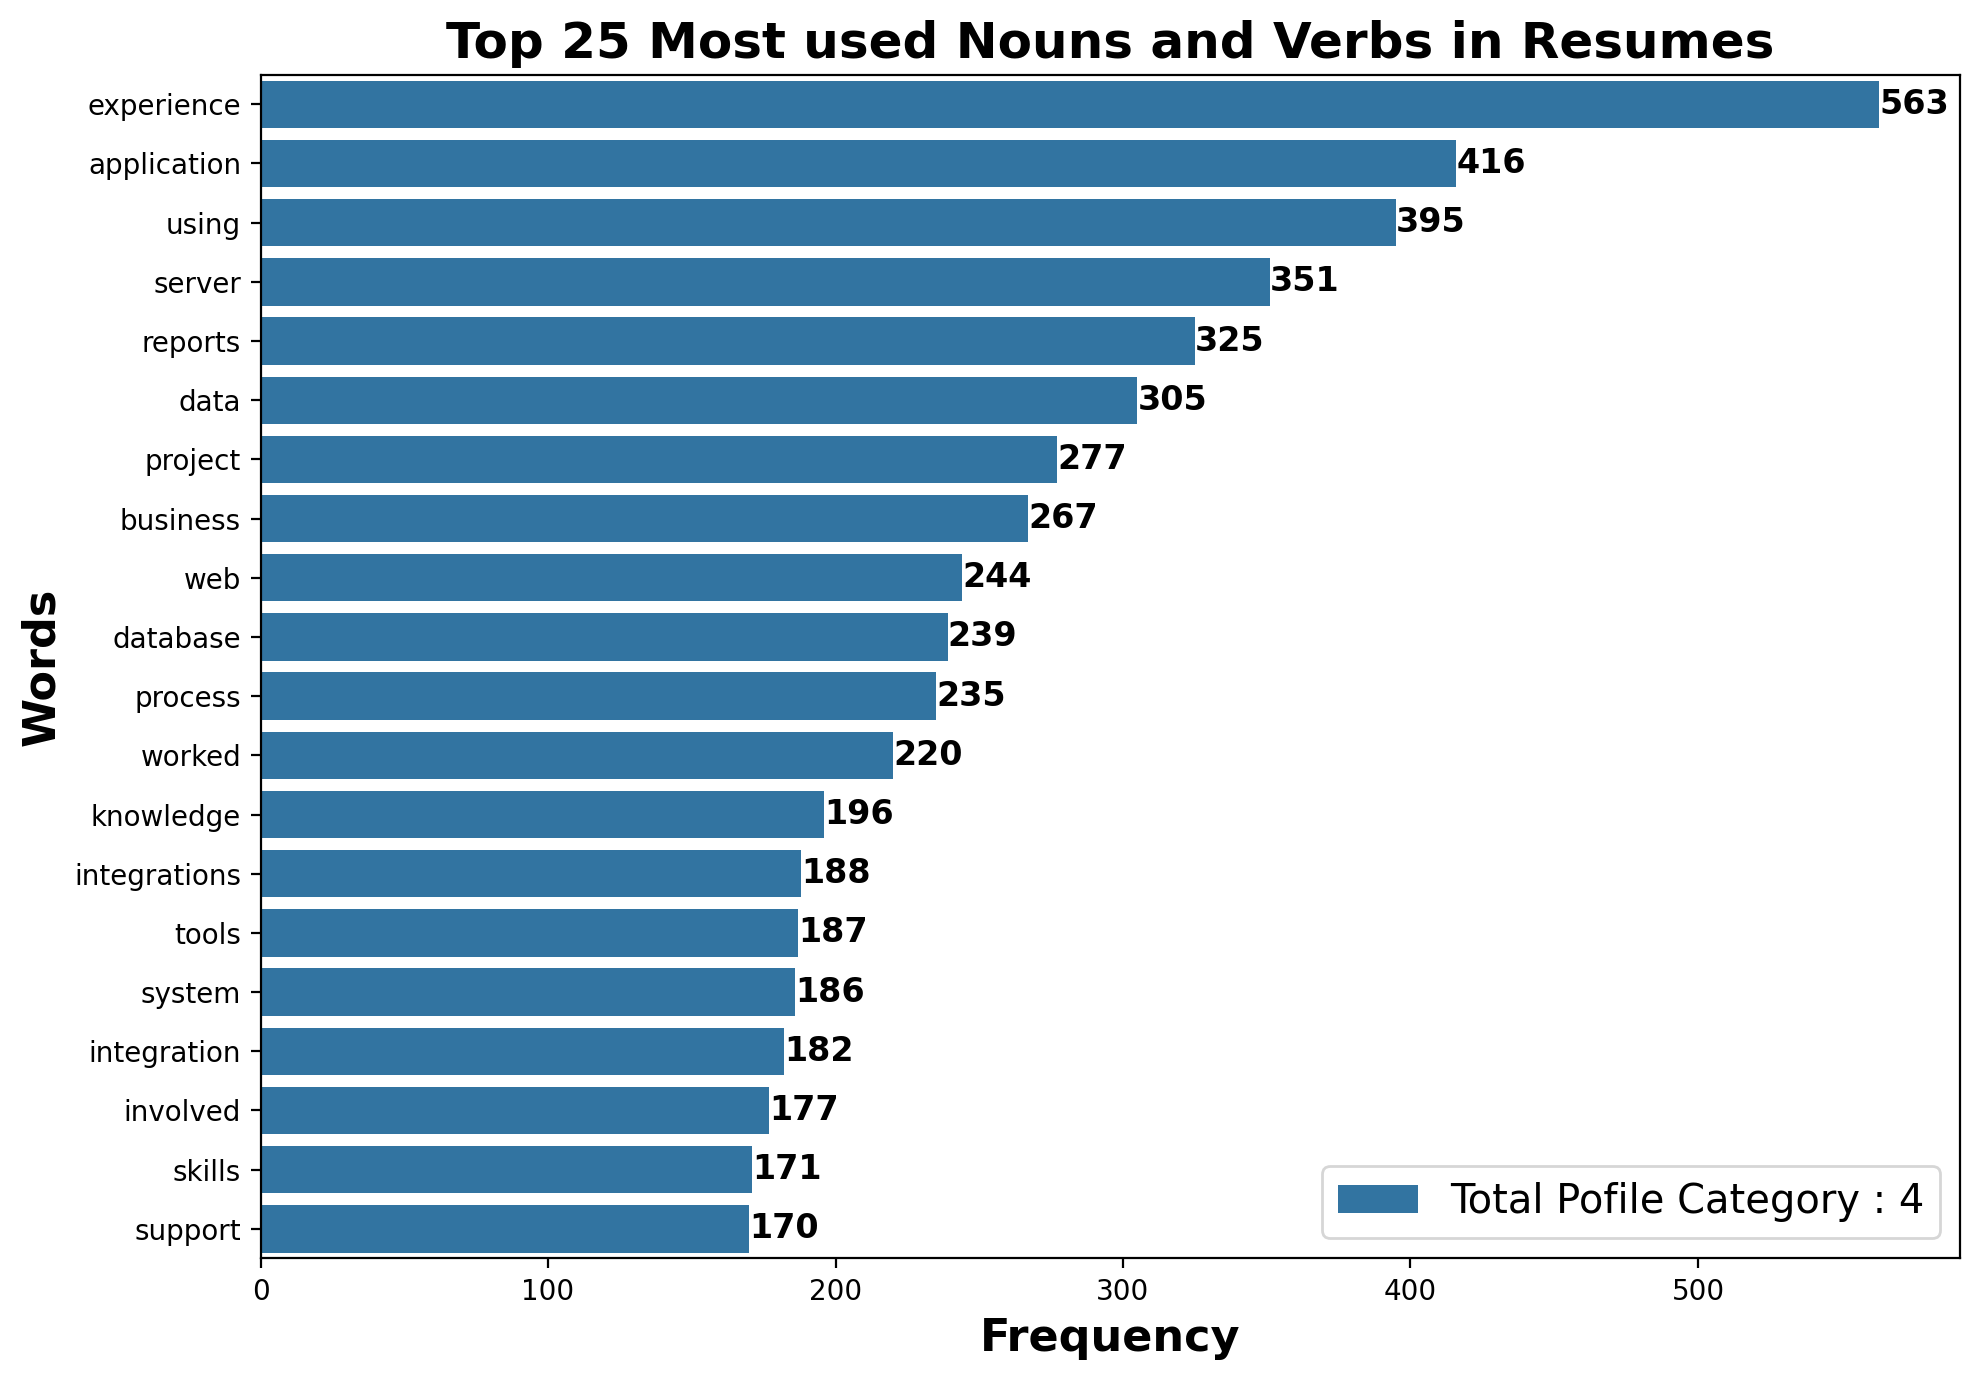

In [61]:
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size=16,fontweight= 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize= 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


<Axes: ylabel='Density'>

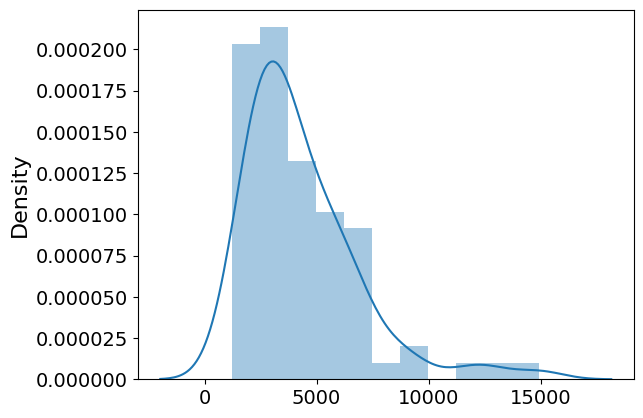

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(x = characters)

In [63]:
from collections import Counter
import seaborn as sns

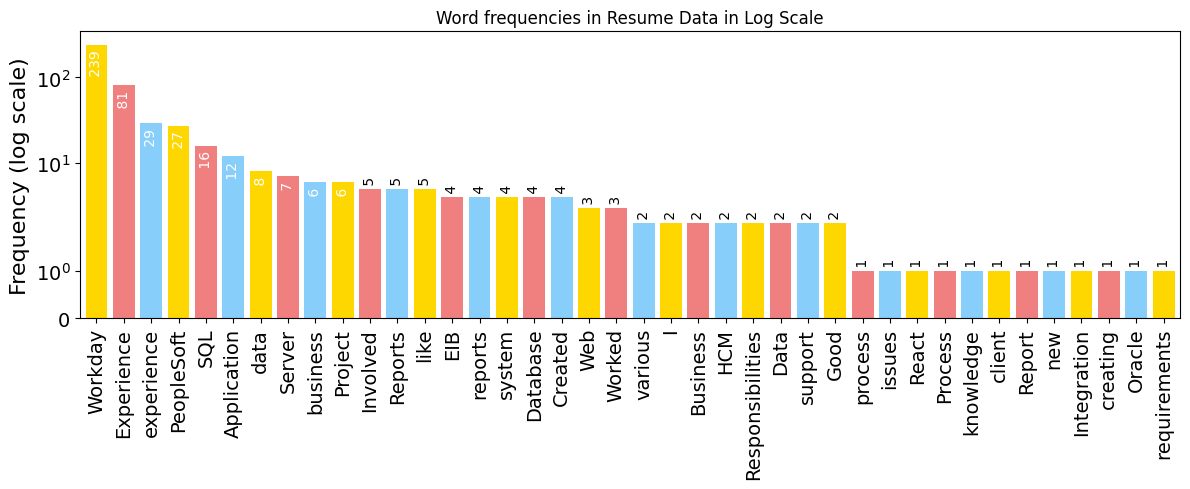

In [64]:
words =['using','Workday','Experience','PeopleSoft',
 'experience','SQL','Application','data','Server',
 'business','Project','reports','like','HCM','Worked',
 'knowledge','Involved','various','Good', 'Reports','React','EIB','integrations','Web','system','creating','issues',
 'Created', 'Responsibilities','Process','process','support',
 'application','new','People','I','team','working',
 'Database','database','Integration','Domains','client',
 'requirements','Core',  'Business',
'Oracle','Report', 'Developer', 'Data']
indices = np.random.zipf(1.6, size=500).astype(np.int) % len(words)
tw = np.array(words)[indices]

tf = Counter(tw)

y = [count for tag, count in tf.most_common(50)]
x = [tag for tag, count in tf.most_common(50)]
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
plt.bar(x, y, color=['gold','lightcoral', 'lightskyblue'])
plt.title("Word frequencies in Resume Data in Log Scale")
plt.ylabel("Frequency (log scale)")
plt.yscale('symlog') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf.most_common(50)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [65]:
def wordBarGraphFunction_1(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    sns.barplot(x=np.arange(20),y= [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.xticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]),rotation=90)
    plt.title(title)
    plt.show()

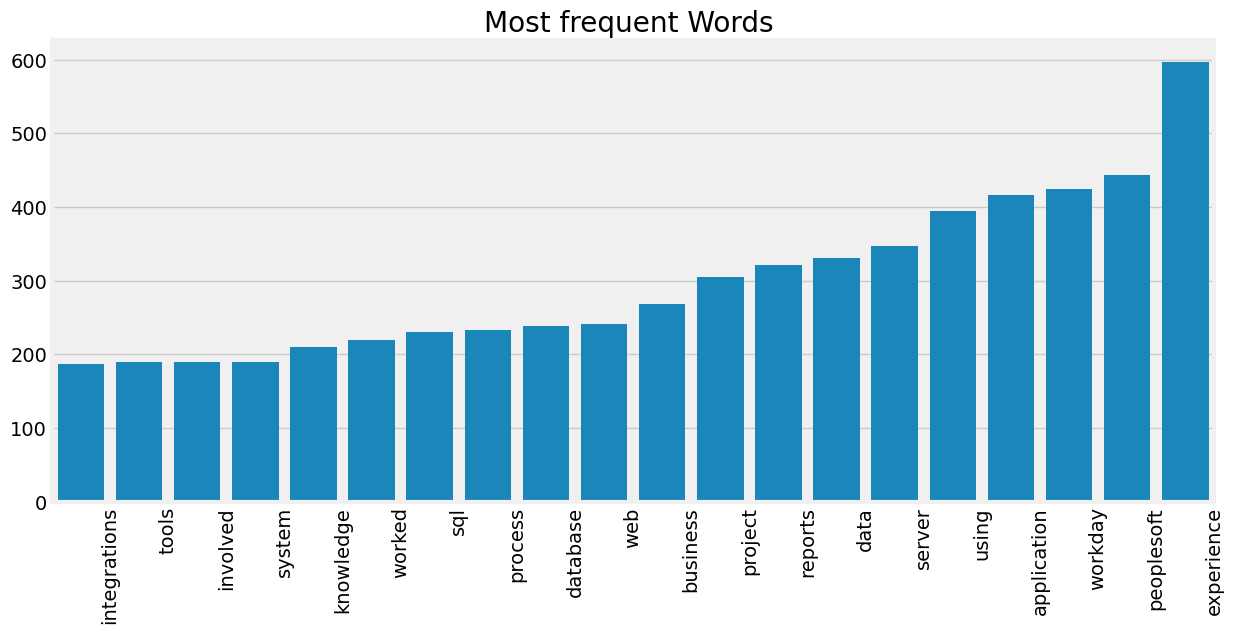

In [66]:
plt.figure(figsize=(15,6))
wordBarGraphFunction_1(Resume_data,"Raw_Details","Most frequent Words ")

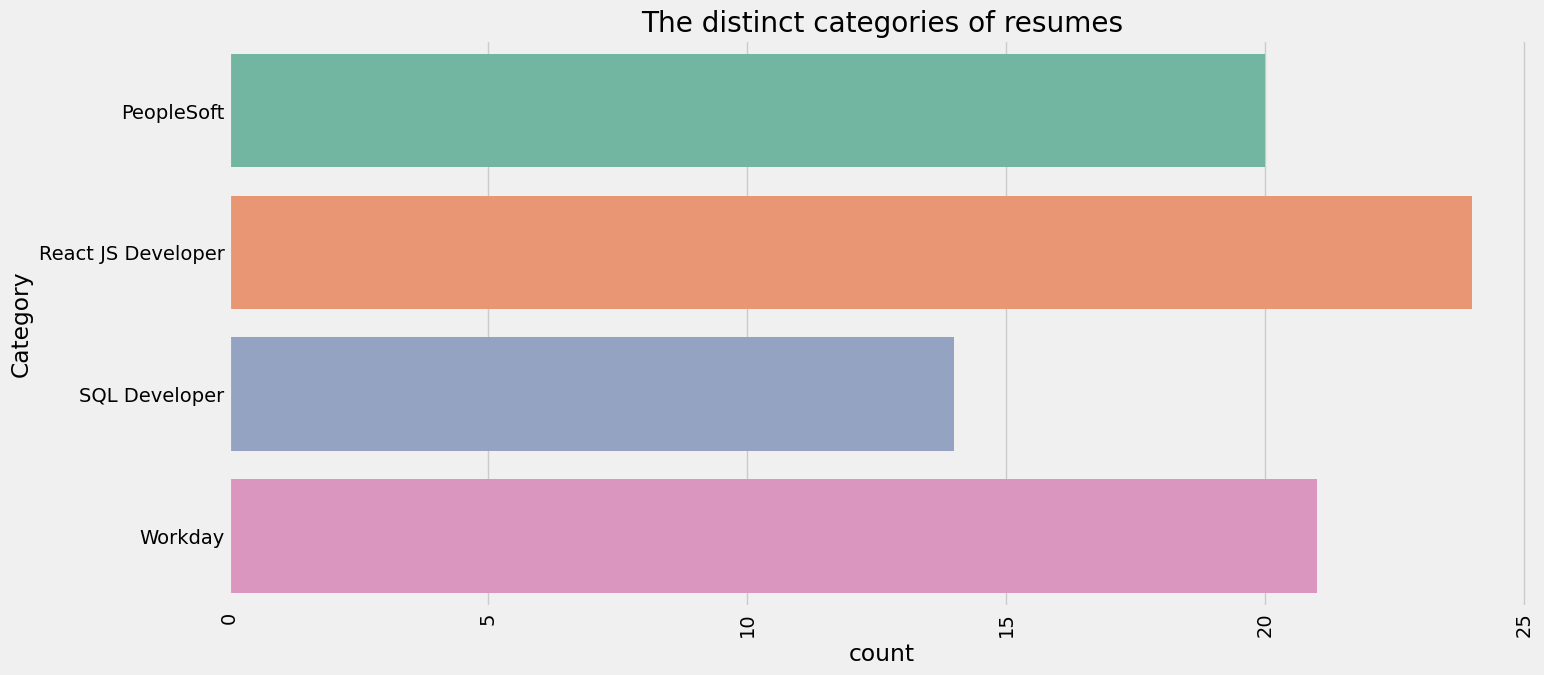

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,7))
plt.title("The distinct categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="Category", data=Resume_data,palette=("Set2"))
plt.show()

In [68]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

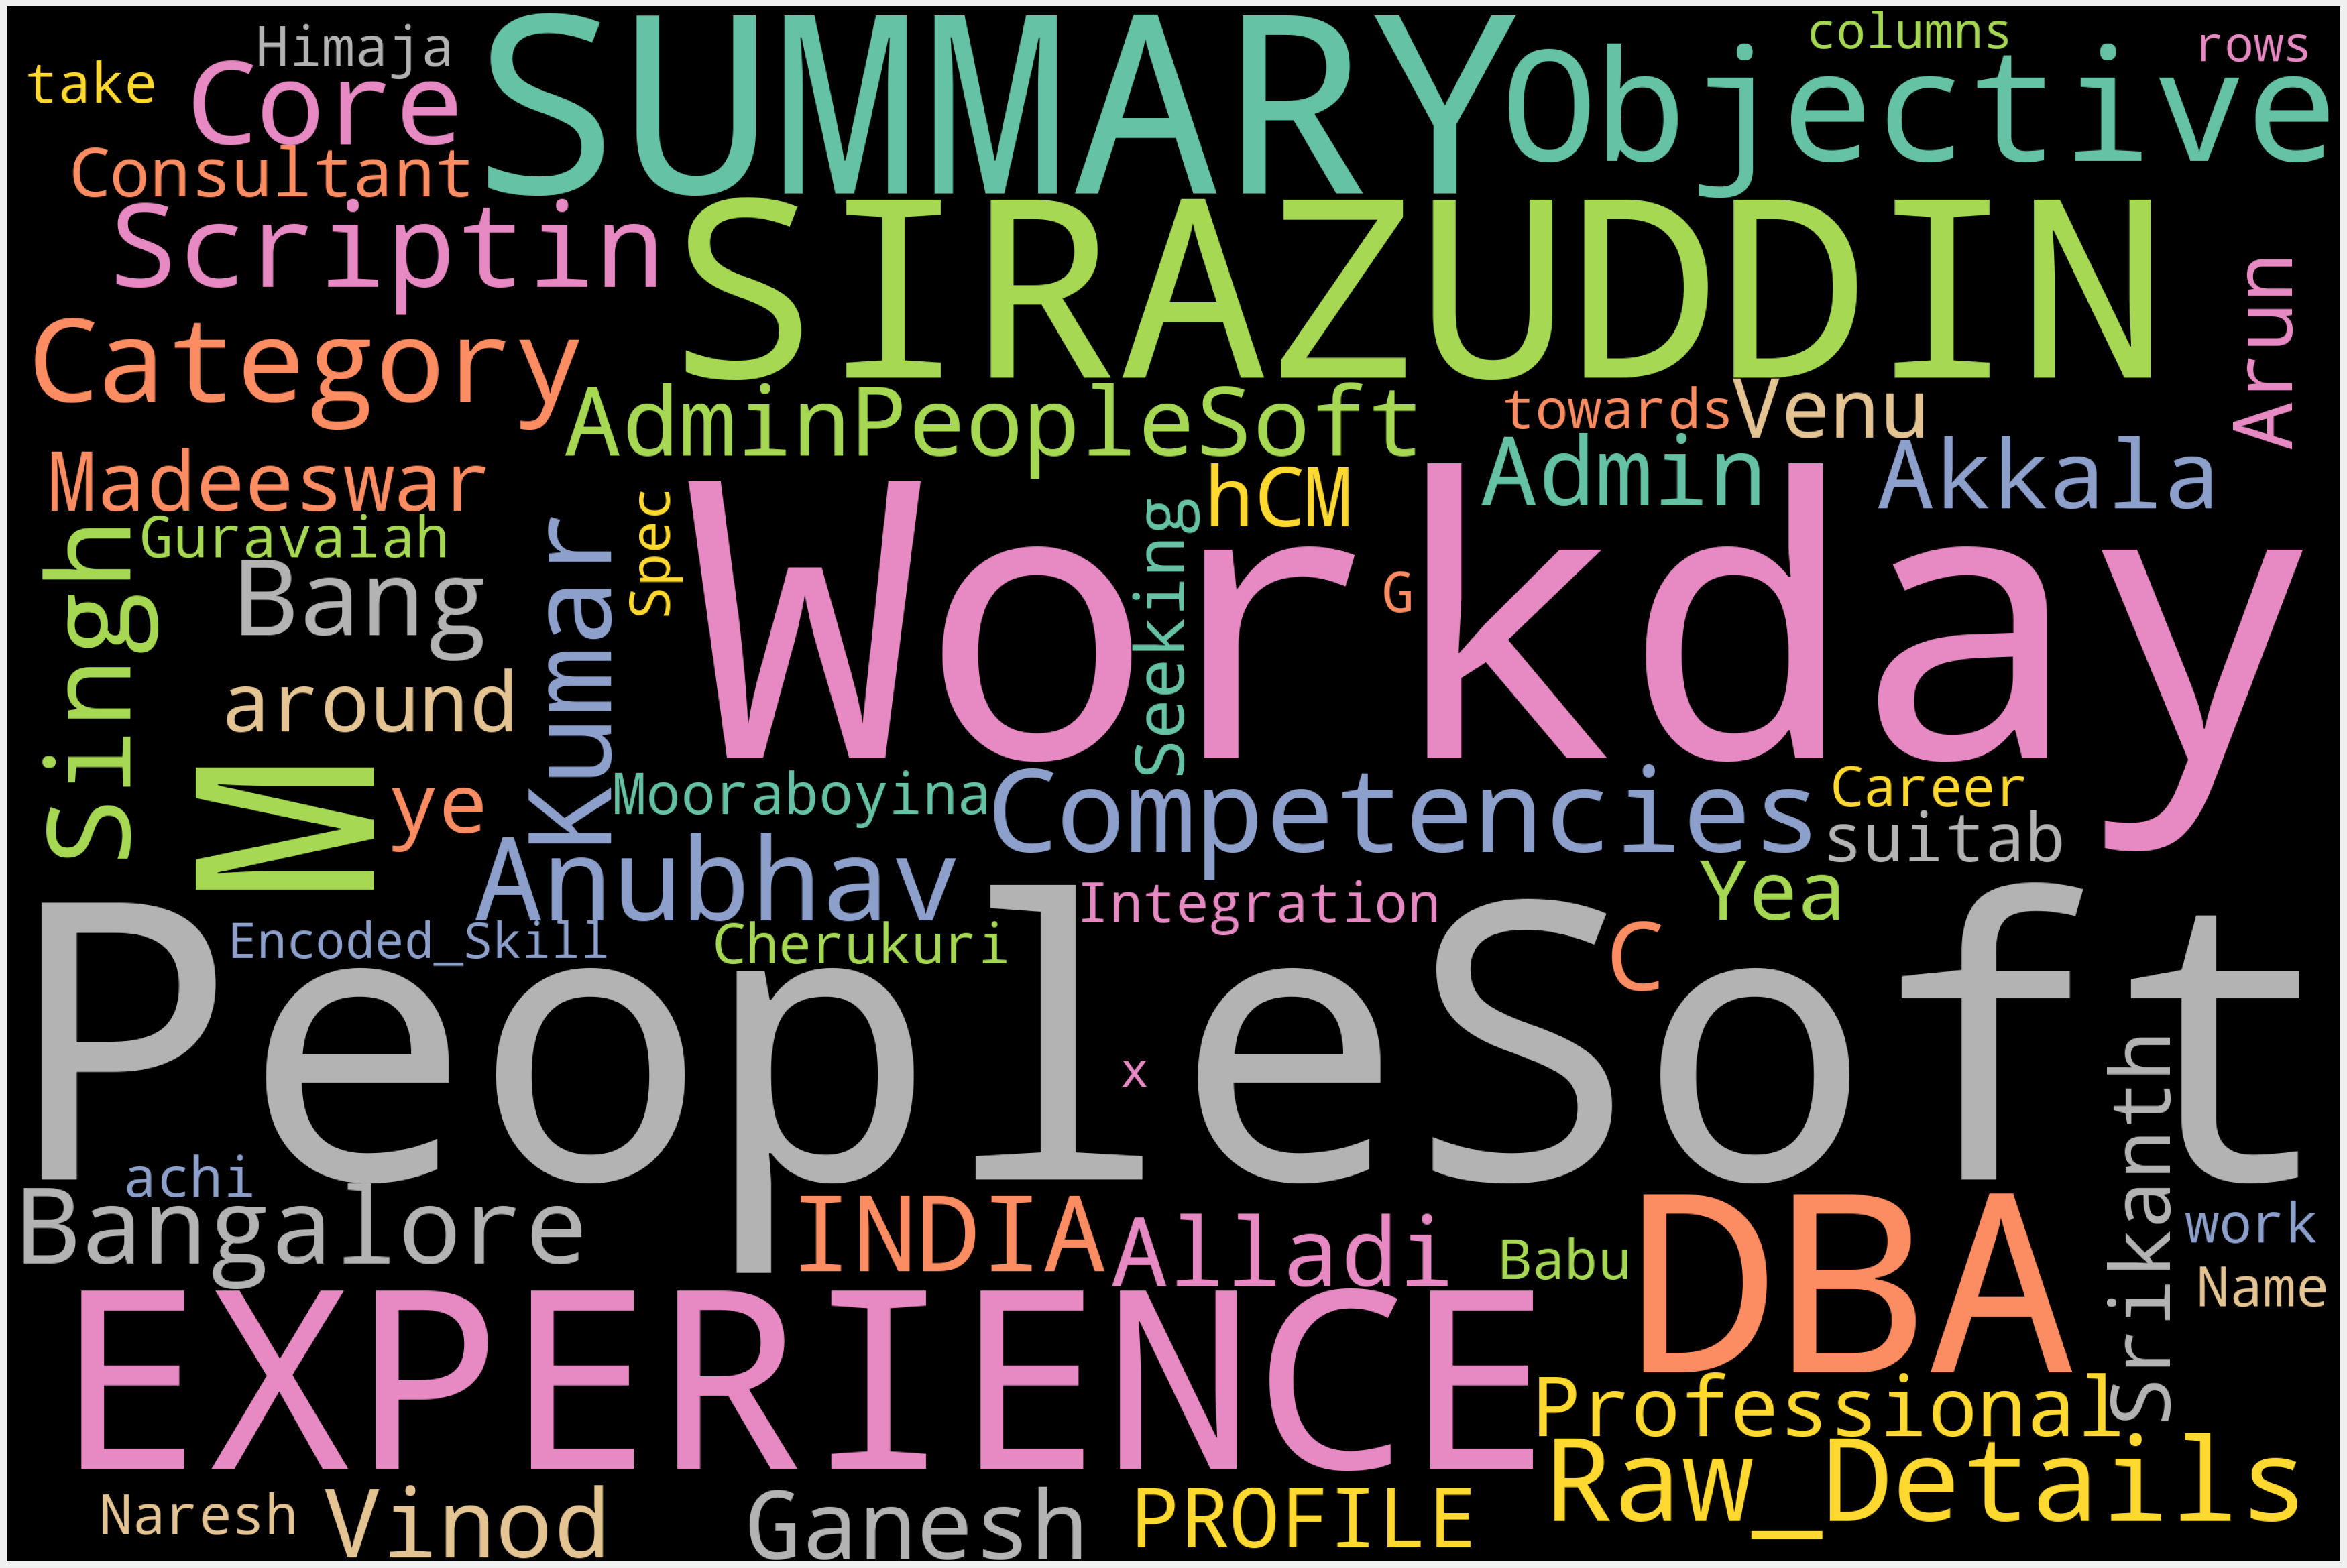

In [69]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(str(Resume_data))
# Plot
plot_cloud(wordcloud)

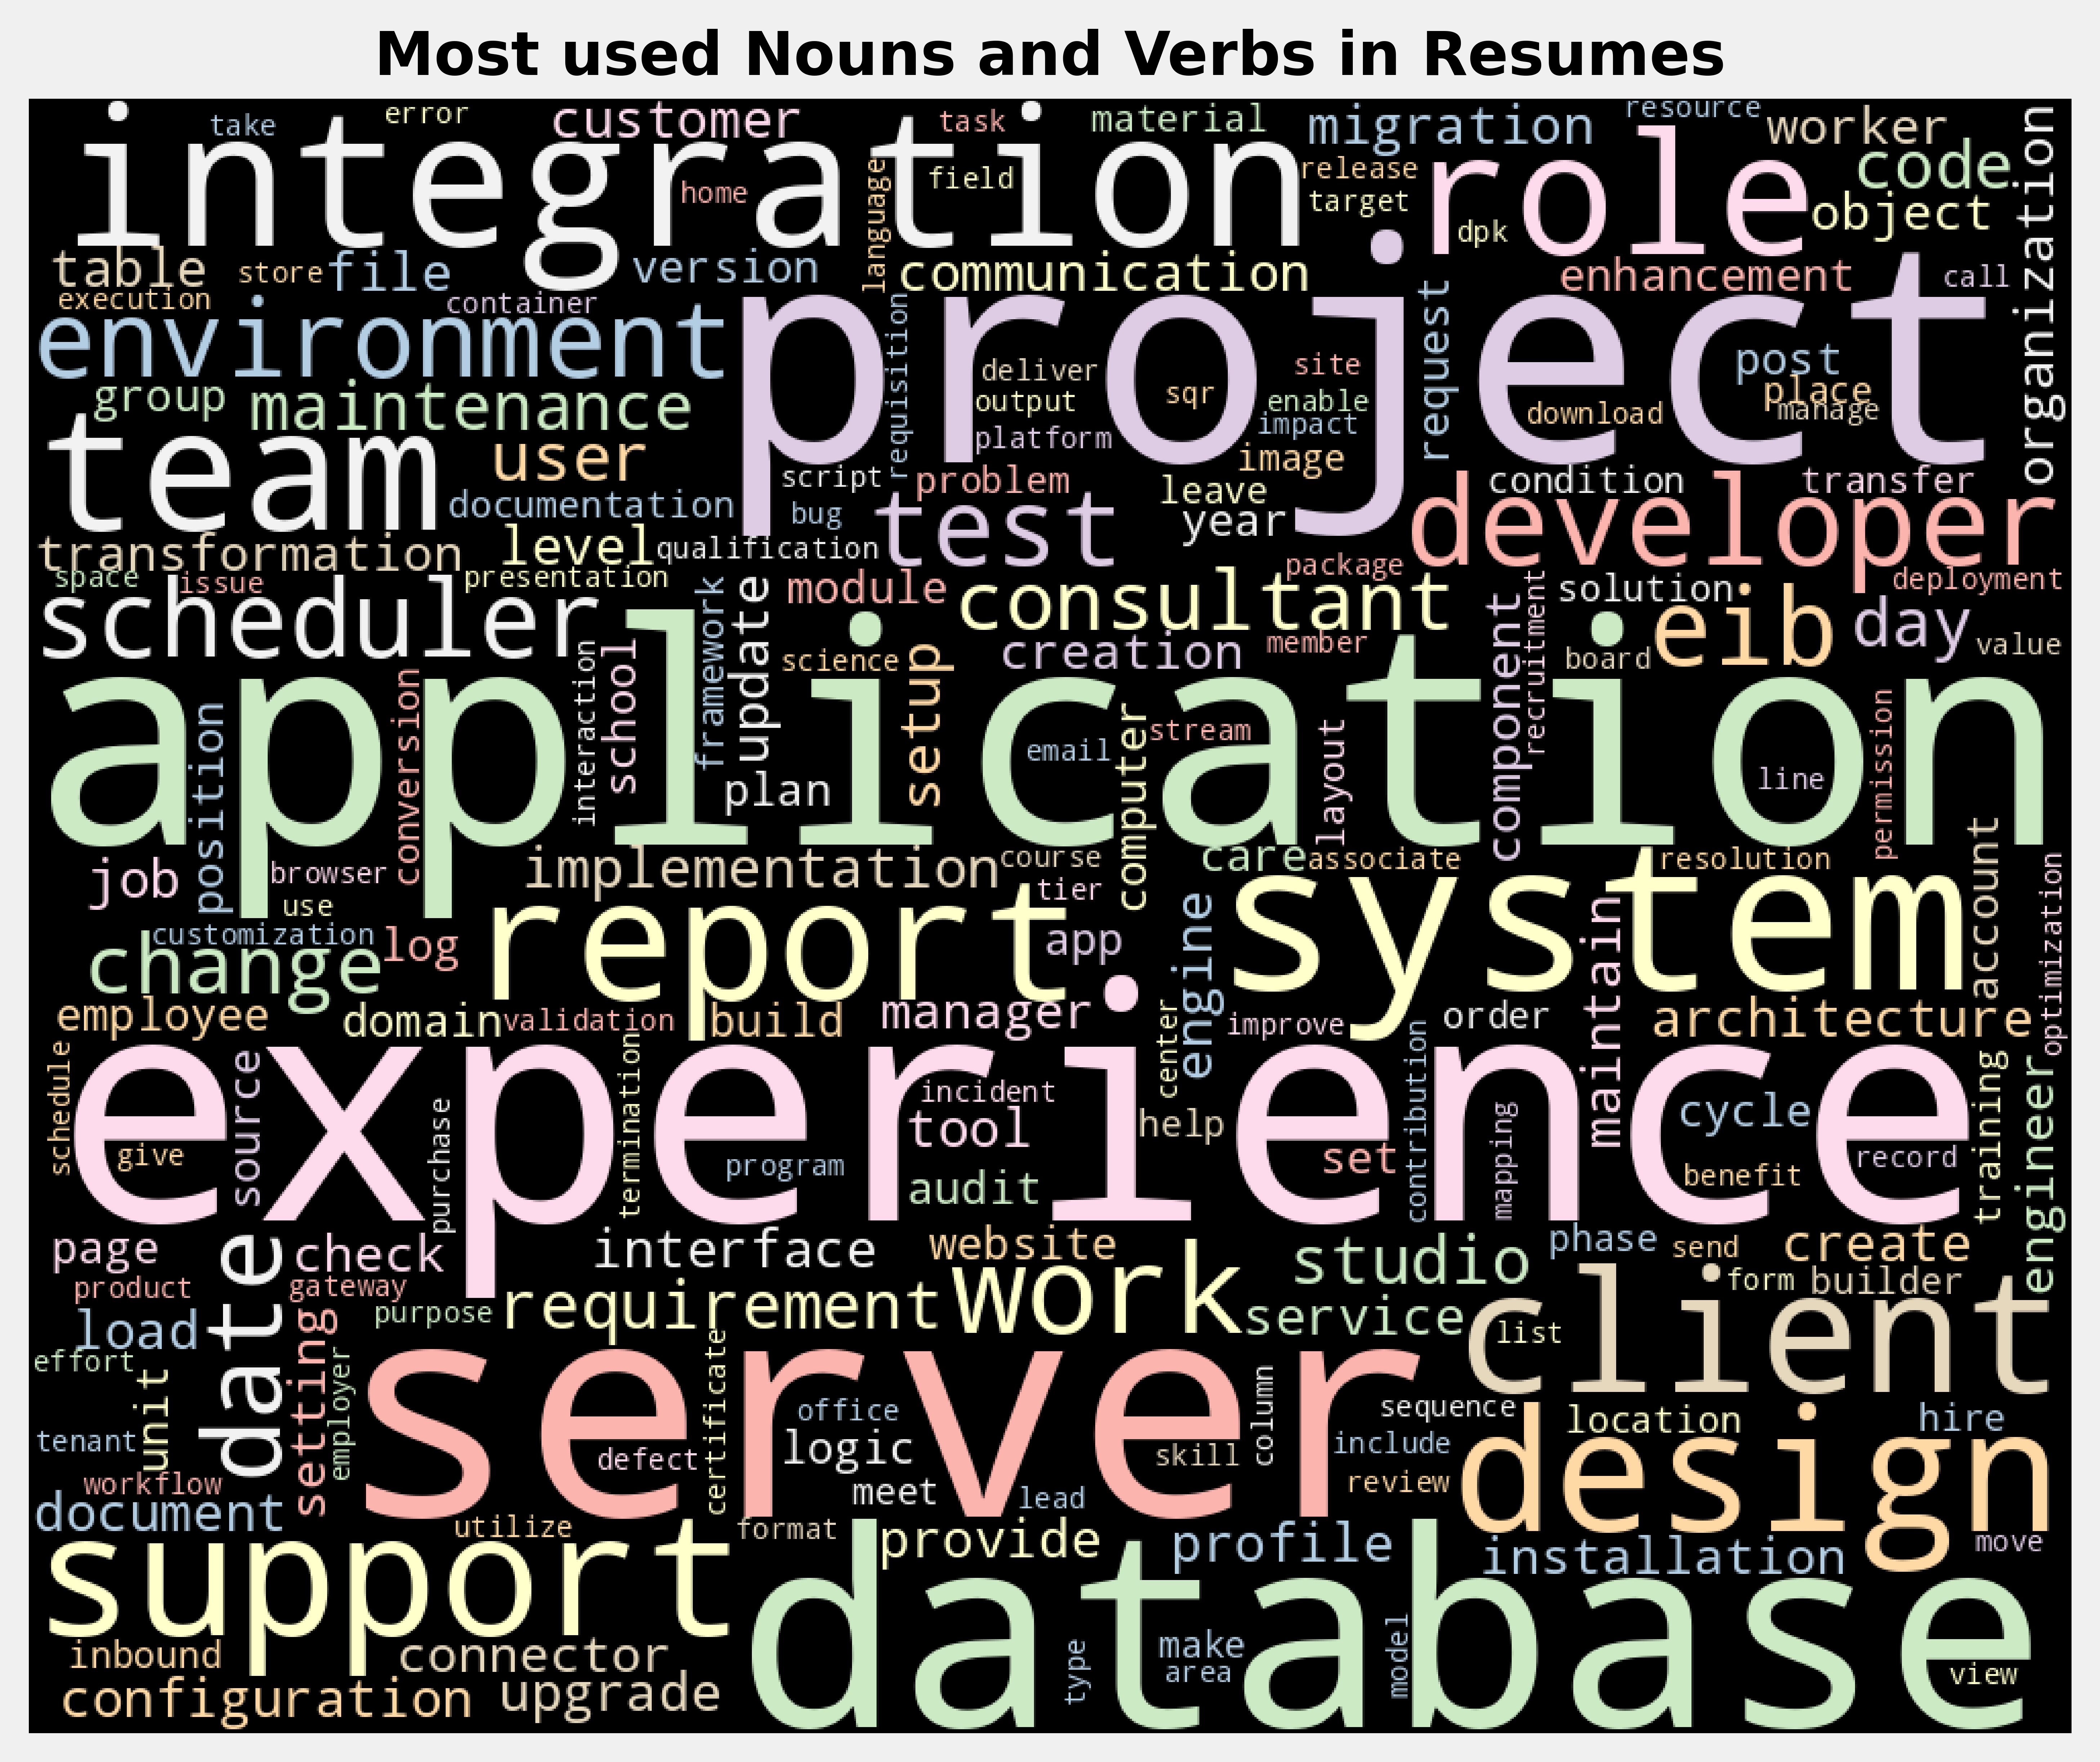

In [70]:
text = " ".join(cat for cat in wd_df.Words) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800) # Display the generated Word Cloud
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

plt.show()

BAG OF WORDS

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

requiredText = Resume_data["Raw_Details"]
requiredTarget = Resume_data["Encoded_Skill"].values

# Create a CountVectorizer instance
Countvectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b[^\d\s]+\b', stop_words='english')

# Fit and transform the text data
bag = Countvectorizer.fit_transform(requiredText)

# Get the vocabulary (word to index mapping)
vocabulary = Countvectorizer.vocabulary_

# Convert the vocabulary to a DataFrame and transpose it
df_vocabulary = pd.DataFrame(list(vocabulary.items()), columns=['Word', 'Index']).set_index('Word').T

# Display the transposed vocabulary
print("Vocabulary:")
print(df_vocabulary)


Vocabulary:
Word   anubhav  kumar  singh  core  competencies  scripting  shell  \
Index      209   2326   3900   930           790       3764   3855   

Word   application  peoplesoft   hcm  ...  screening  shortlist  shortlisted  \
Index          222        3058  1866  ...       3761       3866         3867   

Word   arrangement  interviews  nontechnical  managerial  coordination  \
Index          273        2182          2811        2507           924   

Word   teambusiness  submitted  
Index          4228       4113  

[1 rows x 4777 columns]


In [72]:
requiredText = Resume_data["Raw_Details"]
requiredTarget = Resume_data["Encoded_Skill"].values
Countvectorizer=CountVectorizer(analyzer='word',token_pattern=r'\b[^\d\s]+\b',stop_words = 'english')
bag = Countvectorizer.fit_transform(requiredText)
vocabulary =Countvectorizer.vocabulary_

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample data (replace this with your actual data)
requiredText = Resume_data["Raw_Details"]
requiredTarget = Resume_data["Encoded_Skill"].values

# Create a CountVectorizer instance
Countvectorizer = CountVectorizer(analyzer='word', token_pattern=r'\b[^\d\s]+\b', stop_words='english')

# Fit and transform the text data
bag = Countvectorizer.fit_transform(requiredText)

# Get the feature names
feature_names = Countvectorizer.get_feature_names_out()

# Convert the bag-of-words matrix to a DataFrame
df_bag = pd.DataFrame(bag.toarray(), columns=feature_names)

# Display the DataFrame
print("Bag-of-Words Representation:")
print(df_bag)


Bag-of-Words Representation:
    aa  abdul  abilities  abilitiescommunication  ability  able  \
0    0      0          0                       0        0     0   
1    0      0          0                       0        0     0   
2    0      0          0                       0        0     0   
3    0      0          0                       0        0     0   
4    0      0          0                       0        0     0   
..  ..    ...        ...                     ...      ...   ...   
74   0      0          0                       0        0     0   
75   0      0          0                       0        1     0   
76   0      0          0                       0        1     0   
77   0      0          1                       0        0     0   
78   0      0          0                       0        1     0   

    abovementioned  abreast  abs  absence  ...  z  zealand  zenefits  zero  \
0                0        0    0        0  ...  0        0         0     0   
1         

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

vectorizer1 = CountVectorizer(min_df=1, max_df=0.9)
count_vect = vectorizer1.fit_transform(vocabulary)
word_freq_df = pd.DataFrame({'term': vectorizer1.get_feature_names_out(), 'occurrences': np.asarray(count_vect.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_freq_df['occurrences'])

# Display the DataFrame
print(word_freq_df)


                        term  occurrences  frequency
0                         aa            1    0.00021
1                      abdul            1    0.00021
2                  abilities            1    0.00021
3     abilitiescommunication            1    0.00021
4                    ability            1    0.00021
...                      ...          ...        ...
4747               zerozilla            1    0.00021
4748                   zones            1    0.00021
4749                      zp            1    0.00021
4750                  ﬁnding            1    0.00021
4751                     ﬁts            1    0.00021

[4752 rows x 3 columns]


In [75]:
vectorizer1 = CountVectorizer(min_df = 1, max_df = 0.9)
count_vect = vectorizer1.fit_transform(vocabulary)
word_freq_df = pd.DataFrame({'term': vectorizer1.get_feature_names_out(), 'occurrences':np.asarray(count_vect.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df

term  occurrences  frequency
0                         aa            1    0.00021
1                      abdul            1    0.00021
2                  abilities            1    0.00021
3     abilitiescommunication            1    0.00021
4                    ability            1    0.00021
...                      ...          ...        ...
4747               zerozilla            1    0.00021
4748                   zones            1    0.00021
4749                      zp            1    0.00021
4750                  ﬁnding            1    0.00021
4751                     ﬁts            1    0.00021

[4752 rows x 3 columns]

N- GRAM

In [76]:
pip install textblob


In [77]:
from textblob import TextBlob
TextBlob(resume_data['Raw_Details'][1]).ngrams(1)[:20]

[WordList(['SIRAZUDDIN']),
 WordList(['M']),
 WordList(['Bangalore']),
 WordList(['INDIA']),
 WordList(['SIRAZUDDIN']),
 WordList(['M']),
 WordList(['Bangalore']),
 WordList(['INDIA']),
 WordList(['PROFILE']),
 WordList(['SUMMARY']),
 WordList(['I']),
 WordList(['have']),
 WordList(['overall']),
 WordList(['6.8']),
 WordList(['years']),
 WordList(['’']),
 WordList(['experience']),
 WordList(['as']),
 WordList(['PeopleSoft']),
 WordList(['Administrator'])]

In [78]:
TextBlob(resume_data['Raw_Details'][1]).ngrams(2)[:20]

[WordList(['SIRAZUDDIN', 'M']),
 WordList(['M', 'Bangalore']),
 WordList(['Bangalore', 'INDIA']),
 WordList(['INDIA', 'SIRAZUDDIN']),
 WordList(['SIRAZUDDIN', 'M']),
 WordList(['M', 'Bangalore']),
 WordList(['Bangalore', 'INDIA']),
 WordList(['INDIA', 'PROFILE']),
 WordList(['PROFILE', 'SUMMARY']),
 WordList(['SUMMARY', 'I']),
 WordList(['I', 'have']),
 WordList(['have', 'overall']),
 WordList(['overall', '6.8']),
 WordList(['6.8', 'years']),
 WordList(['years', '’']),
 WordList(['’', 'experience']),
 WordList(['experience', 'as']),
 WordList(['as', 'PeopleSoft']),
 WordList(['PeopleSoft', 'Administrator']),
 WordList(['Administrator', 'Installed'])]

In [79]:
TextBlob(resume_data['Raw_Details'][1]).ngrams(3)[:20]

[WordList(['SIRAZUDDIN', 'M', 'Bangalore']),
 WordList(['M', 'Bangalore', 'INDIA']),
 WordList(['Bangalore', 'INDIA', 'SIRAZUDDIN']),
 WordList(['INDIA', 'SIRAZUDDIN', 'M']),
 WordList(['SIRAZUDDIN', 'M', 'Bangalore']),
 WordList(['M', 'Bangalore', 'INDIA']),
 WordList(['Bangalore', 'INDIA', 'PROFILE']),
 WordList(['INDIA', 'PROFILE', 'SUMMARY']),
 WordList(['PROFILE', 'SUMMARY', 'I']),
 WordList(['SUMMARY', 'I', 'have']),
 WordList(['I', 'have', 'overall']),
 WordList(['have', 'overall', '6.8']),
 WordList(['overall', '6.8', 'years']),
 WordList(['6.8', 'years', '’']),
 WordList(['years', '’', 'experience']),
 WordList(['’', 'experience', 'as']),
 WordList(['experience', 'as', 'PeopleSoft']),
 WordList(['as', 'PeopleSoft', 'Administrator']),
 WordList(['PeopleSoft', 'Administrator', 'Installed']),
 WordList(['Administrator', 'Installed', 'PeopleTools'])]

In [80]:
Resume_data['Raw_Details']

0     Anubhav Kumar Singh Core Competencies Scriptin...
1     SIRAZUDDIN M Bangalore INDIA SIRAZUDDIN M Bang...
2     PeopleSoft AdminPeopleSoft DBA Ganesh Alladi C...
3     Vinod Akkala PeopleSoft DBA Admin Professional...
4     Arun Venu EXPERIENCE SUMMARY Experience 04 Yea...
                            ...                        
74    Madeeswar A PROFILE SUMMARY Having around 6 ye...
75    Srikanth WORKDAY hCM Consultant Seeking suitab...
76    Mooraboyina Guravaiah Workday Integration Spec...
77    Name Naresh Babu Cherukuri Objective To take r...
78    G Himaja Career Objective To work towards achi...
Name: Raw_Details, Length: 79, dtype: object

TFIDF - Term frequency inverse Document Frequency

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [83]:
WordFeatures

<79x5282 sparse matrix of type '<class 'numpy.float64'>'
	with 20885 stored elements in Compressed Sparse Row format>

Model Building || Model Training || Model Evaluation

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=42, test_size=0.3, stratify=requiredTarget)

In [85]:
X_train

<55x5282 sparse matrix of type '<class 'numpy.float64'>'
	with 14133 stored elements in Compressed Sparse Row format>

In [86]:
X_test

<24x5282 sparse matrix of type '<class 'numpy.float64'>'
	with 6752 stored elements in Compressed Sparse Row format>

In [87]:
X_train.shape

(55, 5282)

In [88]:
X_test.shape

(24, 5282)

In [89]:
y_train.shape

(55,)

In [90]:
y_test.shape

(24,)

In [91]:
y_train

array([0, 3, 3, 3, 3, 0, 0, 2, 1, 0, 3, 3, 1, 2, 2, 2, 2, 3, 0, 1, 1, 0,
       1, 1, 1, 0, 3, 3, 0, 2, 3, 0, 0, 2, 0, 3, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 3, 0, 1, 3, 1, 0, 2, 0, 2, 3])

In [92]:
y_test

array([1, 2, 0, 0, 0, 2, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 2, 2, 0, 3,
       0, 0])

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

1. LOGISTIC REGRESSION

In [94]:
model_lgr = LogisticRegression()
model_lgr.fit(X_train, y_train)
y_pred = model_lgr.predict(X_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.78      1.00      0.88         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.91        24
weighted avg       0.94      0.92      0.92        24




2. DECISION TREE

In [95]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [96]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(X_train, y_train)
y_pred = model_DT.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.88
Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.57      0.73         7
           2       0.57      1.00      0.73         4
           3       1.00      1.00      1.00         7

    accuracy                           0.88        24
   macro avg       0.89      0.89      0.86        24
weighted avg       0.93      0.88      0.88        24




3. RANDOM FOREST

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [98]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(X_train, y_train)
y_pred = model_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




4.NAIVE BAYES

In [99]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()


In [100]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(X_train, y_train)
y_pred = model_NB.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




5. SUPPORT VECTOR MACHINE

In [101]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [102]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.78      1.00      0.88         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.91        24
weighted avg       0.94      0.92      0.92        24




6.KNN Classifier

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [104]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.71
Accuracy of  test set    : 0.58
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         6
           1       1.00      0.86      0.92         7
           2       0.00      0.00      0.00         4
           3       0.50      0.29      0.36         7

    accuracy                           0.58        24
   macro avg       0.48      0.54      0.47        24
weighted avg       0.54      0.58      0.53        24




 7. Bagging Classifier

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [106]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(X_train, y_train)
y_pred = model_bagg.predict(X_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




 8. Gradient Boosting Classifier

In [107]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(X_train, y_train)
y_pred = model_GradientBoost.predict(X_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      0.86      0.92         7
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         7

    accuracy                           0.92        24
   macro avg       0.91      0.92      0.91        24
weighted avg       0.92      0.92      0.92        24




In [108]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(X_train, y_train)
y_pred = model_Adaboost.predict(X_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(X_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.83
Classification report for classifier AdaBoostClassifier(n_estimators=100):
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       1.00      0.57      0.73         7
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         7

    accuracy                           0.83        24
   macro avg       0.86      0.85      0.83        24
weighted avg       0.87      0.83      0.83        24




In [109]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(X_train, y_train),model_DT.score(X_train, y_train),model_RF.score(X_train, y_train),model_svm.score(X_train, y_train),model_lgr.score(X_train, y_train),
                                 model_bagg.score(X_train, y_train),model_Adaboost.score(X_train, y_train),model_GradientBoost.score(X_train, y_train), model_NB.score(X_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

Models  Train_Accuracy(%)  Test_Accuracy(%)  \
0                KNN Classifier           0.709091          0.580000   
1       DecisionTree Classifier           1.000000          0.880000   
2       RandomForest Classifier           1.000000          1.000000   
3                SVM Classifier           1.000000          0.920000   
4           Logistic Regression           1.000000          0.920000   
5            Bagging Classifier           1.000000          1.000000   
6           AdaBoost Classifier           1.000000          0.830000   
7  Gradient Boosting Classifier           1.000000          0.916667   
8        Naive Bayes Classifier           1.000000          1.000000   

   Precision(%)  Recall(%)  F1-Score(%)  
0          0.48       0.54         0.47  
1          0.89       0.89         0.86  
2          1.00       1.00         1.00  
3          0.94       0.90         0.91  
4          0.94       0.90         0.91  
5          1.00       1.00         1.00  
6          0.86       0.85         0.83  
7          0.91       0.92         0.91  
8          1.00       1.00         1.00

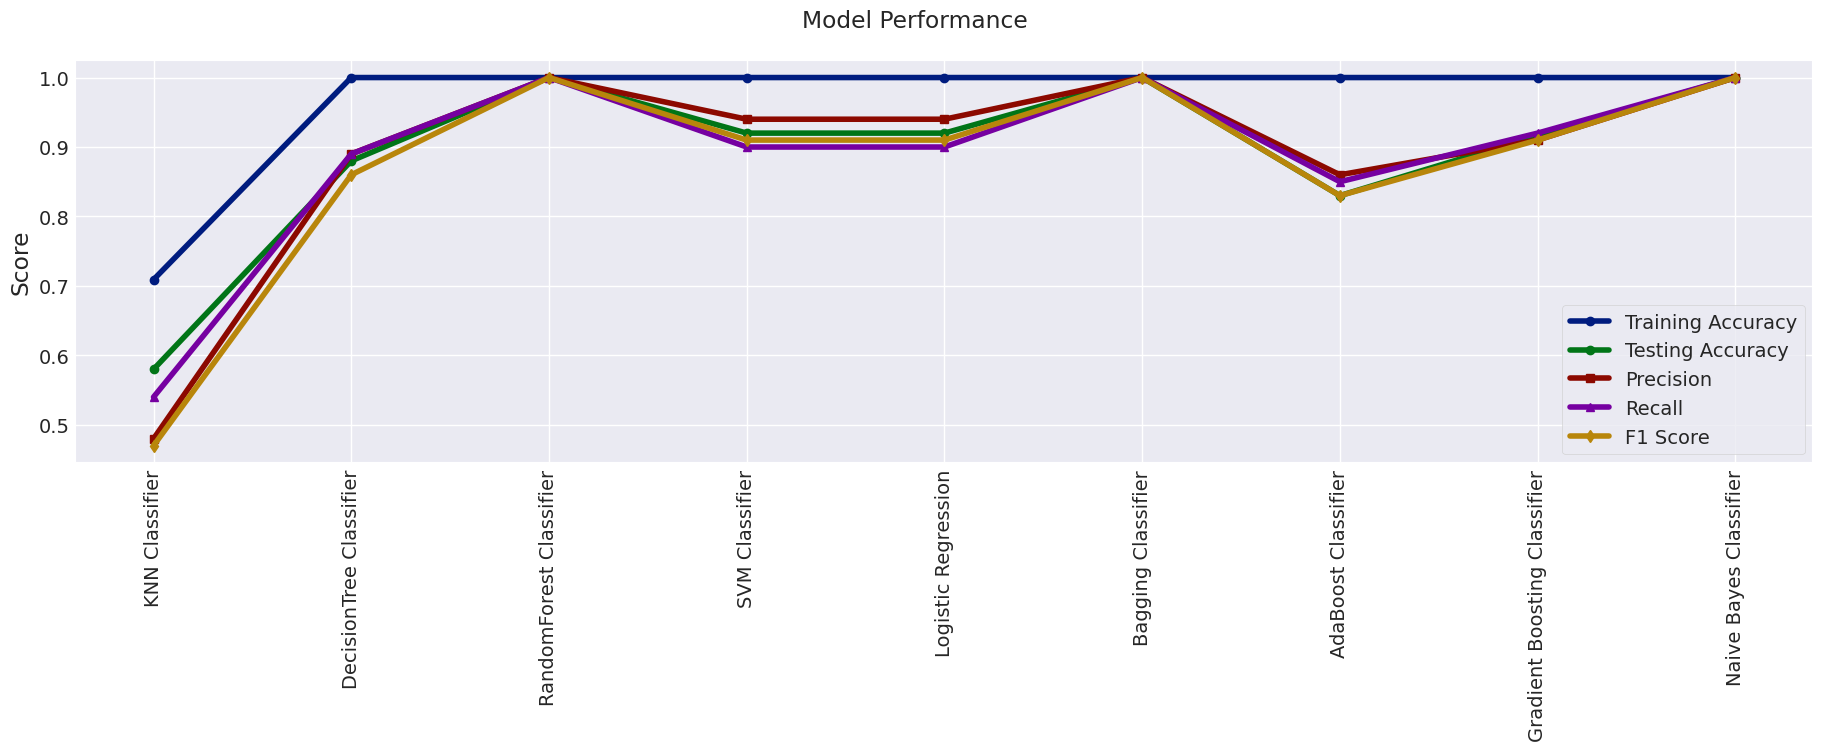

In [110]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,5))
fig.suptitle('Model Performance')

ax.plot(table['Models'], table['Train_Accuracy(%)'], marker='o')
ax.plot(table['Models'], table['Test_Accuracy(%)'], marker='o')
ax.plot(table['Models'], table['Precision(%)'], marker='s')
ax.plot(table['Models'], table['Recall(%)'], marker='^')
ax.plot(table['Models'], table['F1-Score(%)'], marker='d')
ax.set_ylabel('Score')
ax.legend(['Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall', 'F1 Score'], loc='lower right')

plt.xticks(rotation=90)

plt.show()

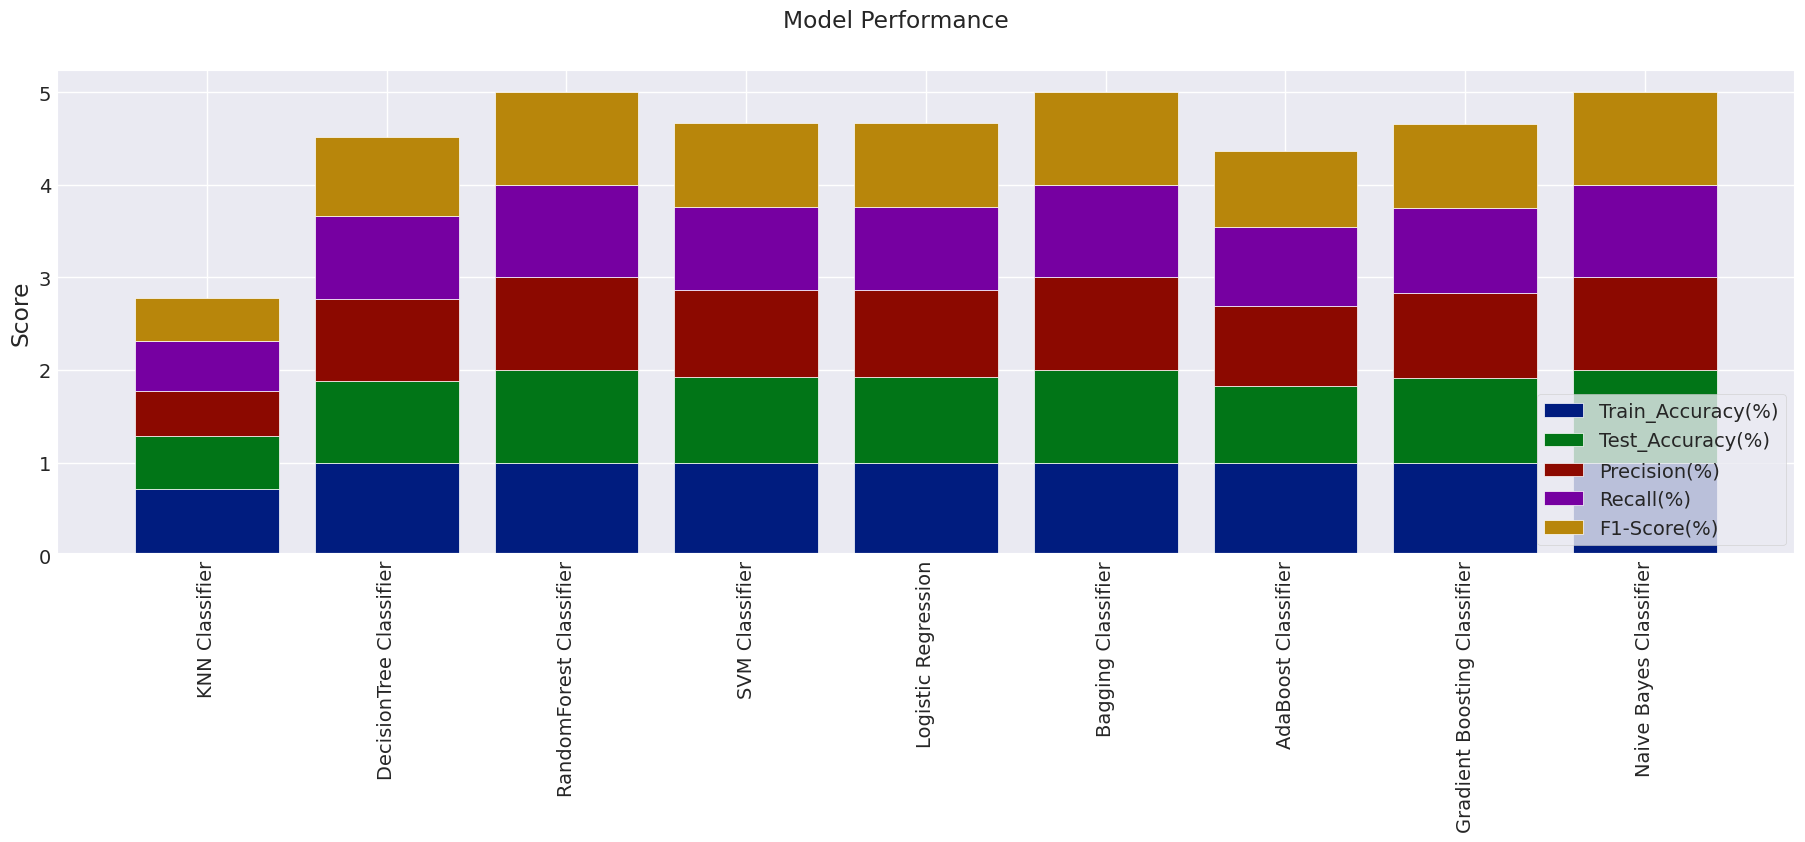

In [111]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20,6))
fig.suptitle('Model Performance')

metrics = ['Train_Accuracy(%)', 'Test_Accuracy(%)', 'Precision(%)', 'Recall(%)', 'F1-Score(%)']
# Plot bars for each classifier and each metric
bottom = np.zeros(len(table))
for metric in metrics:
    ax.bar(table['Models'], table[metric], bottom=bottom)
    bottom += table[metric]
# Set axis labels and legend
ax.set_ylabel('Score')
ax.legend(metrics, loc='lower right')
plt.xticks(rotation=90)
plt.show()

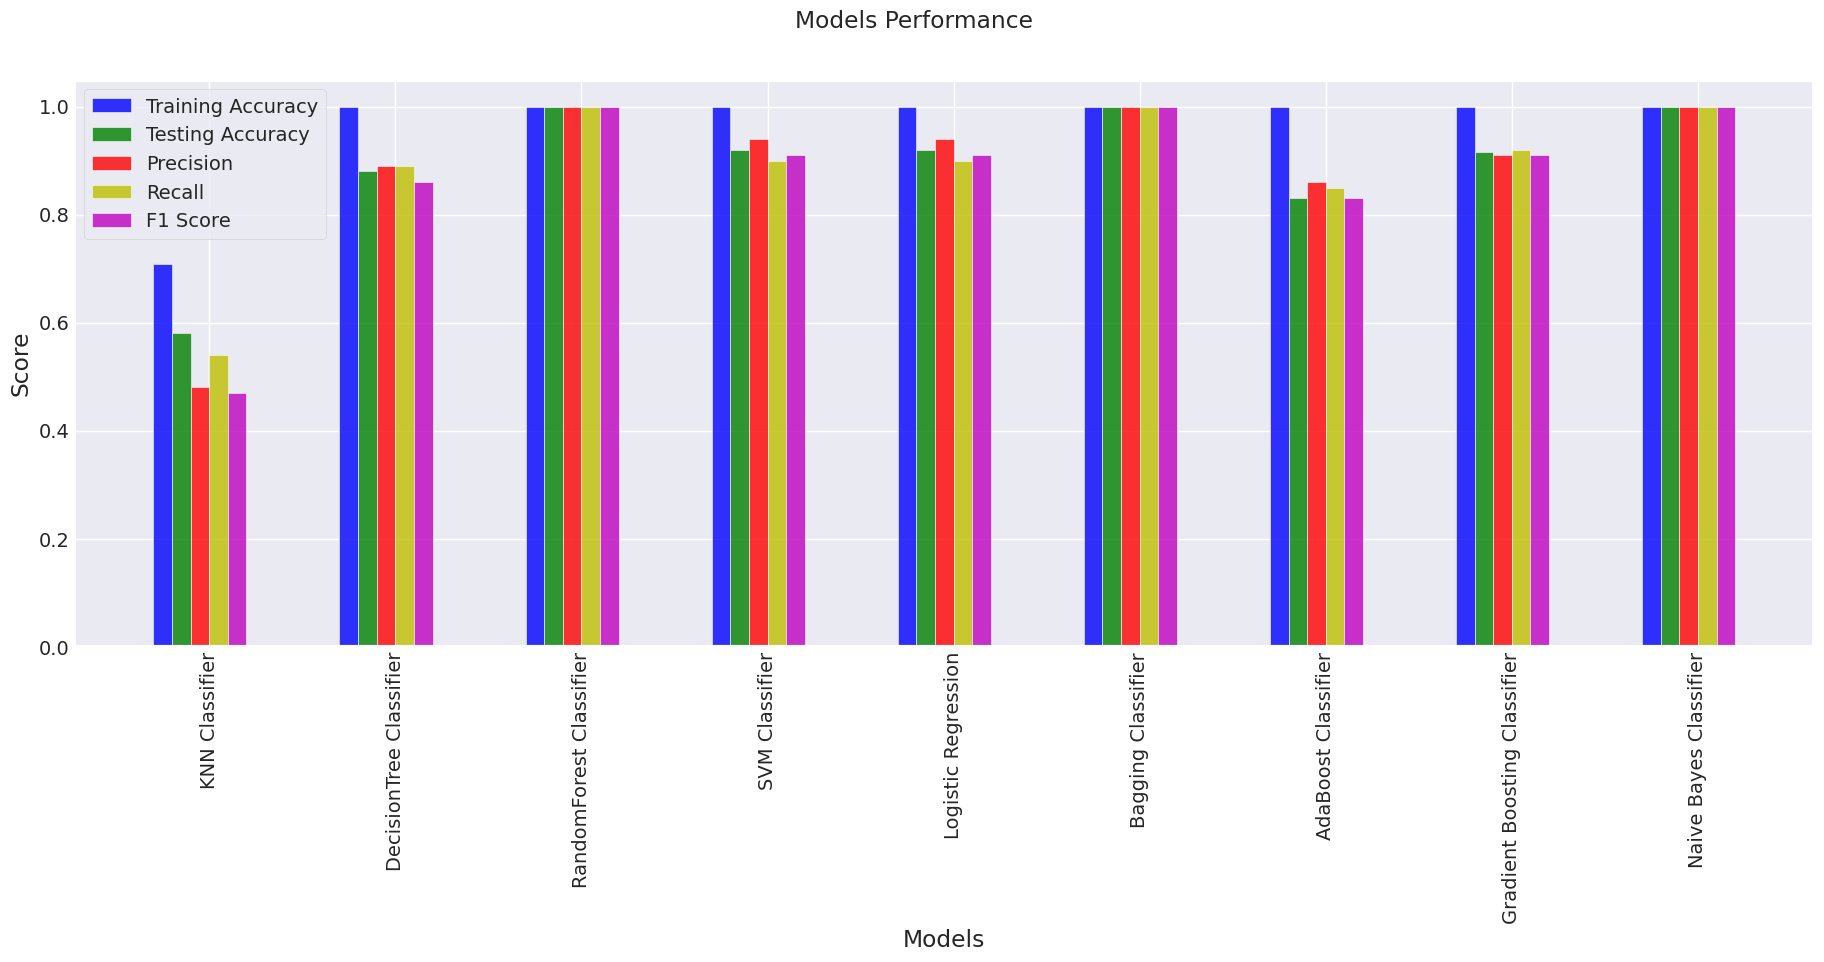

In [112]:
fig, ax = plt.subplots(figsize=(20, 7))
fig.suptitle('Models Performance')

metrics = ['Train Accuracy(%)', 'Test Accuracy(%)', 'Precision(%)', 'Recall(%)', 'F1-Score(%)']

bar_width = 0.1
opacity = 0.8
index = np.arange(len(table['Models']))

# Plot bars for each classifier and each metric
rects1 = ax.bar(index, table['Train_Accuracy(%)'], bar_width, alpha=opacity, color='b', label='Training Accuracy')
rects2 = ax.bar(index + bar_width, table['Test_Accuracy(%)'], bar_width, alpha=opacity, color='g', label='Testing Accuracy')
rects3 = ax.bar(index + 2*bar_width, table['Precision(%)'], bar_width, alpha=opacity, color='r', label='Precision')
rects4 = ax.bar(index + 3*bar_width, table['Recall(%)'], bar_width, alpha=opacity, color='y', label='Recall')
rects5 = ax.bar(index + 4*bar_width, table['F1-Score(%)'], bar_width, alpha=opacity, color='m', label='F1 Score')

# Set axis labels and legend
ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_xticks(index + 2.5*bar_width)
ax.set_xticklabels(table['Models'], rotation=90)
ax.legend()

plt.show()

MODEL DEPLOYMENT

In [113]:
import pickle
from pickle import dump
filename = 'modelNB.pkl'
pickle.dump(model_NB,open(filename,'wb'))

In [114]:
import pickle
from pickle import dump
filename =  'wordvectorizer.pkl'
pickle.dump(word_vectorizer,open(filename,'wb'))

In [115]:
from google.colab import files
files.download('modelNB.pkl')
files.download('wordvectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>